In [2]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.7 MB/s eta 0:00:00


In [3]:
import koreanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyproj
import folium

# 반려동물과 관련 있는 장소

In [4]:
# 좌표계 변환(중부원점 -> 경도 위도)
def project_array(coord, p1, p2):
    # transformer = pyproj.Transformer.from_crs(p1_type, p2_type)
    # return transformer.transform(coord[:, 0], coord[:, 1])
    p1 = pyproj.Proj(init = p1_type)
    p2 = pyproj.Proj(init = p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]


    # transformer = pyproj.Transformer.from_crs(p1, p2)
    # fx, fy = transformer.transform(coord[:, 0], coord[:, 1])
    # return np.dstack([fx, fy])[0]

## 동물병원 수집

In [5]:
df = pd.read_csv('/content/drive/MyDrive/데이터 분석/꼬순내/data/서울시 동물병원 인허가 정보.csv', encoding='cp949')
df.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),축산업무구분명,축산물가공업구분명,축산일련번호,권리주체일련번호,총인원
0,3150000,315000001020200003,2020-06-16,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2022-12-03 00:03:00.0,NaN,185831.959022,451192.093585,NaN,NaN,NaN,NaN,NaN
1,3150000,315000001020020007,2002-12-05,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2022-12-03 00:03:00.0,NaN,185521.368171,450368.363434,NaN,NaN,NaN,NaN,NaN
2,3230000,323000001019930002,1993-07-02,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2022-12-03 00:03:00.0,NaN,210245.052535,445108.572829,NaN,NaN,NaN,NaN,NaN
3,3070000,307000001020080004,2008-10-16,NaN,1,영업/정상,0,정상,NaN,NaN,...,U,2022-12-03 00:04:00.0,NaN,201682.296448,453515.272297,NaN,NaN,NaN,NaN,NaN
4,3240000,324000001020230001,2023-03-07,NaN,1,영업/정상,0,정상,NaN,NaN,...,I,2022-12-03 00:09:00.0,NaN,214846.333742,450705.800053,NaN,NaN,NaN,NaN,NaN


In [6]:
# 필요한 컬럼 가져오기

df1 = df[['사업장명', '지번주소', '도로명주소', '좌표정보(X)', '좌표정보(Y)', '상세영업상태명']]
df1

,사업장명,지번주소,도로명주소,좌표정보(X),좌표정보(Y),상세영업상태명
0,차지우동물병원,서울특별시 강서구 등촌동 680 한울빌딩,"서울특별시 강서구 강서로62길 10, 한울빌딩 1층 (등촌동)",185831.959022,451192.093585,정상
1,박동물병원,서울특별시 강서구 내발산동 655-12,"서울특별시 강서구 강서로 333, 104호 105호 (내발산동)",185521.368171,450368.363434,정상
2,페토피아종합동물병원,서울특별시 송파구 방이동 124-8 남양빌딩,"서울특별시 송파구 오금로 203, 남양빌딩 (방이동)",210245.052535,445108.572829,정상
3,24시 애니동물병원,서울특별시 성북구 보문동5가 3-1,서울특별시 성북구 보문로 99 (보문동5가),201682.296448,453515.272297,정상
4,피카소동물병원,서울특별시 강동구 고덕동 191-3,"서울특별시 강동구 고덕로83길 32, 2층 (고덕동)",214846.333742,450705.800053,정상
...,...,...,...,...,...,...
2076,내방동물병원,서울특별시 서초구 방배동 898-3,"서울특별시 서초구 서초대로 108, 2층 (방배동)",199410.881389,442807.588411,정상
2077,양지동물병원,서울특별시 관악구 봉천동 959-9 제이에스빌딩,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",194128.542770,442576.937599,정상
2078,샤인동물메디컬센터,서울특별시 송파구 방이동 108-7,서울특별시 송파구 오금로 147 (방이동),209787.947726,445412.462950,정상
2079,우쭈쭈동물건강검진센터 역삼점,서울특별시 강남구 역삼동 725-29 제이유34,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",203513.056528,444190.759645,정상


In [7]:
df1['상세영업상태명'].value_counts()

폐업    1156
정상     912
휴업       7
말소       6
Name: 상세영업상태명, dtype: int64

In [8]:
# 정상 영업 하고 있는 데이터 가져오기

df2 = df1[df1['상세영업상태명'] == '정상']
df2

,사업장명,지번주소,도로명주소,좌표정보(X),좌표정보(Y),상세영업상태명
0,차지우동물병원,서울특별시 강서구 등촌동 680 한울빌딩,"서울특별시 강서구 강서로62길 10, 한울빌딩 1층 (등촌동)",185831.959022,451192.093585,정상
1,박동물병원,서울특별시 강서구 내발산동 655-12,"서울특별시 강서구 강서로 333, 104호 105호 (내발산동)",185521.368171,450368.363434,정상
2,페토피아종합동물병원,서울특별시 송파구 방이동 124-8 남양빌딩,"서울특별시 송파구 오금로 203, 남양빌딩 (방이동)",210245.052535,445108.572829,정상
3,24시 애니동물병원,서울특별시 성북구 보문동5가 3-1,서울특별시 성북구 보문로 99 (보문동5가),201682.296448,453515.272297,정상
4,피카소동물병원,서울특별시 강동구 고덕동 191-3,"서울특별시 강동구 고덕로83길 32, 2층 (고덕동)",214846.333742,450705.800053,정상
...,...,...,...,...,...,...
2076,내방동물병원,서울특별시 서초구 방배동 898-3,"서울특별시 서초구 서초대로 108, 2층 (방배동)",199410.881389,442807.588411,정상
2077,양지동물병원,서울특별시 관악구 봉천동 959-9 제이에스빌딩,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",194128.542770,442576.937599,정상
2078,샤인동물메디컬센터,서울특별시 송파구 방이동 108-7,서울특별시 송파구 오금로 147 (방이동),209787.947726,445412.462950,정상
2079,우쭈쭈동물건강검진센터 역삼점,서울특별시 강남구 역삼동 725-29 제이유34,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",203513.056528,444190.759645,정상


In [9]:
# 좌표 정보가 없는 데이터 제외하기

df3 = df2.dropna(subset = ['좌표정보(X)', '좌표정보(Y)'])
df3

,사업장명,지번주소,도로명주소,좌표정보(X),좌표정보(Y),상세영업상태명
0,차지우동물병원,서울특별시 강서구 등촌동 680 한울빌딩,"서울특별시 강서구 강서로62길 10, 한울빌딩 1층 (등촌동)",185831.959022,451192.093585,정상
1,박동물병원,서울특별시 강서구 내발산동 655-12,"서울특별시 강서구 강서로 333, 104호 105호 (내발산동)",185521.368171,450368.363434,정상
2,페토피아종합동물병원,서울특별시 송파구 방이동 124-8 남양빌딩,"서울특별시 송파구 오금로 203, 남양빌딩 (방이동)",210245.052535,445108.572829,정상
3,24시 애니동물병원,서울특별시 성북구 보문동5가 3-1,서울특별시 성북구 보문로 99 (보문동5가),201682.296448,453515.272297,정상
4,피카소동물병원,서울특별시 강동구 고덕동 191-3,"서울특별시 강동구 고덕로83길 32, 2층 (고덕동)",214846.333742,450705.800053,정상
...,...,...,...,...,...,...
2076,내방동물병원,서울특별시 서초구 방배동 898-3,"서울특별시 서초구 서초대로 108, 2층 (방배동)",199410.881389,442807.588411,정상
2077,양지동물병원,서울특별시 관악구 봉천동 959-9 제이에스빌딩,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",194128.542770,442576.937599,정상
2078,샤인동물메디컬센터,서울특별시 송파구 방이동 108-7,서울특별시 송파구 오금로 147 (방이동),209787.947726,445412.462950,정상
2079,우쭈쭈동물건강검진센터 역삼점,서울특별시 강남구 역삼동 725-29 제이유34,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",203513.056528,444190.759645,정상


In [10]:
df4 = df3[['좌표정보(X)', '좌표정보(Y)']]
l = np.array(df4)
l

array([[185831.9590222 , 451192.09358536],
       [185521.36817135, 450368.3634338 ],
       [210245.05253497, 445108.57282929],
       ...,
       [209787.94772603, 445412.46295026],
       [203513.05652773, 444190.75964478],
       [207048.63818941, 445470.10561086]])

In [11]:
# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(l, p1_type, p2_type)
result

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-4-e3c7106c557e>:7: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord

array([[126.83753883,  37.56289874],
       [126.83403979,  37.5554722 ],
       [127.11377097,  37.5081404 ],
       ...,
       [127.1086051 ,  37.51088336],
       [127.03762718,  37.4999206 ],
       [127.07762269,  37.5114275 ]])

In [12]:
df5 = df3.copy()
df5['경도'] = result[:, 0]
df5['위도'] = result[:, 1]

df5

,사업장명,지번주소,도로명주소,좌표정보(X),좌표정보(Y),상세영업상태명,경도,위도
0,차지우동물병원,서울특별시 강서구 등촌동 680 한울빌딩,"서울특별시 강서구 강서로62길 10, 한울빌딩 1층 (등촌동)",185831.959022,451192.093585,정상,126.837539,37.562899
1,박동물병원,서울특별시 강서구 내발산동 655-12,"서울특별시 강서구 강서로 333, 104호 105호 (내발산동)",185521.368171,450368.363434,정상,126.834040,37.555472
2,페토피아종합동물병원,서울특별시 송파구 방이동 124-8 남양빌딩,"서울특별시 송파구 오금로 203, 남양빌딩 (방이동)",210245.052535,445108.572829,정상,127.113771,37.508140
3,24시 애니동물병원,서울특별시 성북구 보문동5가 3-1,서울특별시 성북구 보문로 99 (보문동5가),201682.296448,453515.272297,정상,127.016944,37.583939
4,피카소동물병원,서울특별시 강동구 고덕동 191-3,"서울특별시 강동구 고덕로83길 32, 2층 (고덕동)",214846.333742,450705.800053,정상,127.165924,37.558509
...,...,...,...,...,...,...,...,...
2076,내방동물병원,서울특별시 서초구 방배동 898-3,"서울특별시 서초구 서초대로 108, 2층 (방배동)",199410.881389,442807.588411,정상,126.991237,37.487464
2077,양지동물병원,서울특별시 관악구 봉천동 959-9 제이에스빌딩,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",194128.542770,442576.937599,정상,126.931512,37.485367
2078,샤인동물메디컬센터,서울특별시 송파구 방이동 108-7,서울특별시 송파구 오금로 147 (방이동),209787.947726,445412.462950,정상,127.108605,37.510883
2079,우쭈쭈동물건강검진센터 역삼점,서울특별시 강남구 역삼동 725-29 제이유34,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",203513.056528,444190.759645,정상,127.037627,37.499921


In [13]:
final_data = df5[['사업장명','도로명주소','위도', '경도']]
# final_data
final_data.to_csv('/content/drive/MyDrive/데이터 분석/꼬순내/data/동물병원_위도경도.csv',index = False, encoding = 'cp949')

In [14]:
final_data

,사업장명,도로명주소,위도,경도
0,차지우동물병원,"서울특별시 강서구 강서로62길 10, 한울빌딩 1층 (등촌동)",37.562899,126.837539
1,박동물병원,"서울특별시 강서구 강서로 333, 104호 105호 (내발산동)",37.555472,126.834040
2,페토피아종합동물병원,"서울특별시 송파구 오금로 203, 남양빌딩 (방이동)",37.508140,127.113771
3,24시 애니동물병원,서울특별시 성북구 보문로 99 (보문동5가),37.583939,127.016944
4,피카소동물병원,"서울특별시 강동구 고덕로83길 32, 2층 (고덕동)",37.558509,127.165924
...,...,...,...,...
2076,내방동물병원,"서울특별시 서초구 서초대로 108, 2층 (방배동)",37.487464,126.991237
2077,양지동물병원,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",37.485367,126.931512
2078,샤인동물메디컬센터,서울특별시 송파구 오금로 147 (방이동),37.510883,127.108605
2079,우쭈쭈동물건강검진센터 역삼점,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",37.499921,127.037627


In [15]:
final_data1 = final_data.copy()
final_data1['지역'] = final_data['도로명주소'].str.split(' ').str[1]

final_data1

,사업장명,도로명주소,위도,경도,지역
0,차지우동물병원,"서울특별시 강서구 강서로62길 10, 한울빌딩 1층 (등촌동)",37.562899,126.837539,강서구
1,박동물병원,"서울특별시 강서구 강서로 333, 104호 105호 (내발산동)",37.555472,126.834040,강서구
2,페토피아종합동물병원,"서울특별시 송파구 오금로 203, 남양빌딩 (방이동)",37.508140,127.113771,송파구
3,24시 애니동물병원,서울특별시 성북구 보문로 99 (보문동5가),37.583939,127.016944,성북구
4,피카소동물병원,"서울특별시 강동구 고덕로83길 32, 2층 (고덕동)",37.558509,127.165924,강동구
...,...,...,...,...,...
2076,내방동물병원,"서울특별시 서초구 서초대로 108, 2층 (방배동)",37.487464,126.991237,서초구
2077,양지동물병원,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",37.485367,126.931512,관악구
2078,샤인동물메디컬센터,서울특별시 송파구 오금로 147 (방이동),37.510883,127.108605,송파구
2079,우쭈쭈동물건강검진센터 역삼점,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",37.499921,127.037627,강남구


## 공원 수집

In [16]:
df_p = pd.read_csv('/content/drive/MyDrive/데이터 분석/꼬순내/data/서울시 주요 공원현황.csv', encoding='cp949')
df_p.head()

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,2,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,3,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267,437163.981,127.019846,37.426449,http://grandpark.seoul.go.kr/
3,4,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432,449290.726,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,5,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070,451598.831,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...


In [17]:
df_p1 = df_p[['공원명', '공원주소', 'X좌표(WGS84)', 'Y좌표(WGS84)', '지역']]
df_p1

,공원명,공원주소,X좌표(WGS84),Y좌표(WGS84),지역
0,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140,중구
1,길동생태공원,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394,강동구
2,서울대공원,경기도 과천시 대공원광장로 102,127.019846,37.426449,과천시
3,서울숲,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072,성동구
4,월드컵공원,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805,마포구
...,...,...,...,...,...
127,용마도시자연공원(사가정공원),서울특별시 중랑구 면목7동 산50,127.095997,37.579762,중랑구
128,문화비축기지,서울특별시 마포구 증산로 87,126.893246,37.571718,마포구
129,경춘선숲길,노원구 공릉2동 산 82-2,127.076482,37.627077,NaN
130,율현공원,서울특별시 강남구 율현동 밤고개로24길(율현동 56),127.115594,37.472332,강남구


In [18]:
df_p2 = df_p1.dropna(subset = ['Y좌표(WGS84)', '지역'])
df_p2

,공원명,공원주소,X좌표(WGS84),Y좌표(WGS84),지역
0,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140,중구
1,길동생태공원,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394,강동구
2,서울대공원,경기도 과천시 대공원광장로 102,127.019846,37.426449,과천시
3,서울숲,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072,성동구
4,월드컵공원,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805,마포구
...,...,...,...,...,...
125,숭인근린공원,서울특별시 종로구 숭인동 58,127.017827,37.576442,종로구
126,서일대뒷산공원,서울특별시 중랑구 면목동 산19,127.098782,37.587716,중랑구
127,용마도시자연공원(사가정공원),서울특별시 중랑구 면목7동 산50,127.095997,37.579762,중랑구
128,문화비축기지,서울특별시 마포구 증산로 87,126.893246,37.571718,마포구


In [19]:
df_p3 = df_p2.copy()
new_column = {'공원명' : '이름', '공원주소' : '주소', 'X좌표(WGS84)' : '경도', 'Y좌표(WGS84)' : '위도'}
df_p3['종류'] = '공원'
df_p3.rename(columns = new_column, inplace = True)
df_p3 = df_p3[['이름', '주소', '위도','경도','지역','종류']]
df_p3

,이름,주소,위도,경도,지역,종류
0,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,중구,공원
1,길동생태공원,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,강동구,공원
2,서울대공원,경기도 과천시 대공원광장로 102,37.426449,127.019846,과천시,공원
3,서울숲,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,성동구,공원
4,월드컵공원,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,마포구,공원
...,...,...,...,...,...,...
125,숭인근린공원,서울특별시 종로구 숭인동 58,37.576442,127.017827,종로구,공원
126,서일대뒷산공원,서울특별시 중랑구 면목동 산19,37.587716,127.098782,중랑구,공원
127,용마도시자연공원(사가정공원),서울특별시 중랑구 면목7동 산50,37.579762,127.095997,중랑구,공원
128,문화비축기지,서울특별시 마포구 증산로 87,37.571718,126.893246,마포구,공원


In [20]:
df_h = final_data1.copy()
new_column = {'사업장명' : '이름', '도로명주소' : '주소'}
df_h['종류'] = '동물병원'
df_h.rename(columns = new_column, inplace = True)
df_h

,이름,주소,위도,경도,지역,종류
0,차지우동물병원,"서울특별시 강서구 강서로62길 10, 한울빌딩 1층 (등촌동)",37.562899,126.837539,강서구,동물병원
1,박동물병원,"서울특별시 강서구 강서로 333, 104호 105호 (내발산동)",37.555472,126.834040,강서구,동물병원
2,페토피아종합동물병원,"서울특별시 송파구 오금로 203, 남양빌딩 (방이동)",37.508140,127.113771,송파구,동물병원
3,24시 애니동물병원,서울특별시 성북구 보문로 99 (보문동5가),37.583939,127.016944,성북구,동물병원
4,피카소동물병원,"서울특별시 강동구 고덕로83길 32, 2층 (고덕동)",37.558509,127.165924,강동구,동물병원
...,...,...,...,...,...,...
2076,내방동물병원,"서울특별시 서초구 서초대로 108, 2층 (방배동)",37.487464,126.991237,서초구,동물병원
2077,양지동물병원,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",37.485367,126.931512,관악구,동물병원
2078,샤인동물메디컬센터,서울특별시 송파구 오금로 147 (방이동),37.510883,127.108605,송파구,동물병원
2079,우쭈쭈동물건강검진센터 역삼점,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",37.499921,127.037627,강남구,동물병원


In [21]:
final_data = pd.concat([df_p3, df_h], ignore_index=True)
final_data

,이름,주소,위도,경도,지역,종류
0,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,중구,공원
1,길동생태공원,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,강동구,공원
2,서울대공원,경기도 과천시 대공원광장로 102,37.426449,127.019846,과천시,공원
3,서울숲,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,성동구,공원
4,월드컵공원,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,마포구,공원
...,...,...,...,...,...,...
1016,내방동물병원,"서울특별시 서초구 서초대로 108, 2층 (방배동)",37.487464,126.991237,서초구,동물병원
1017,양지동물병원,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",37.485367,126.931512,관악구,동물병원
1018,샤인동물메디컬센터,서울특별시 송파구 오금로 147 (방이동),37.510883,127.108605,송파구,동물병원
1019,우쭈쭈동물건강검진센터 역삼점,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",37.499921,127.037627,강남구,동물병원


In [22]:
final_data.to_csv('/content/drive/MyDrive/데이터 분석/꼬순내/data/위도경도.csv',index = False, encoding = 'cp949')

## 시각화

In [23]:
final_data

,이름,주소,위도,경도,지역,종류
0,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,중구,공원
1,길동생태공원,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,강동구,공원
2,서울대공원,경기도 과천시 대공원광장로 102,37.426449,127.019846,과천시,공원
3,서울숲,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,성동구,공원
4,월드컵공원,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,마포구,공원
...,...,...,...,...,...,...
1016,내방동물병원,"서울특별시 서초구 서초대로 108, 2층 (방배동)",37.487464,126.991237,서초구,동물병원
1017,양지동물병원,"서울특별시 관악구 남부순환로191길 6, 제이에스빌딩 1층 (봉천동)",37.485367,126.931512,관악구,동물병원
1018,샤인동물메디컬센터,서울특별시 송파구 오금로 147 (방이동),37.510883,127.108605,송파구,동물병원
1019,우쭈쭈동물건강검진센터 역삼점,"서울특별시 강남구 테헤란로34길 26, 제이유34 2층 (역삼동)",37.499921,127.037627,강남구,동물병원


### 지역 별 분포

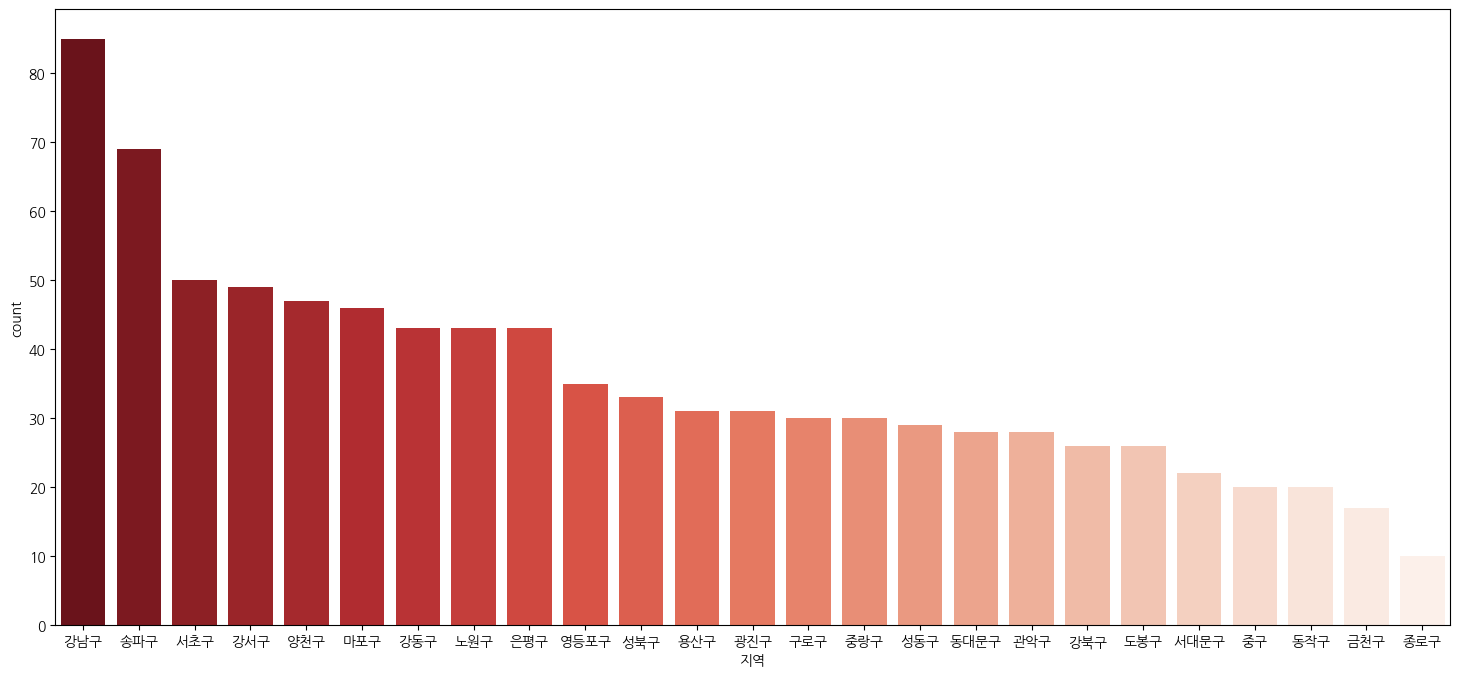

In [24]:
plt.figure(figsize = (18, 8))
sns.countplot(data = final_data[final_data['종류'] == '동물병원'], x = '지역', order = final_data[final_data['종류'] == '동물병원']['지역'].value_counts().index, palette="Reds_r")

plt.show()

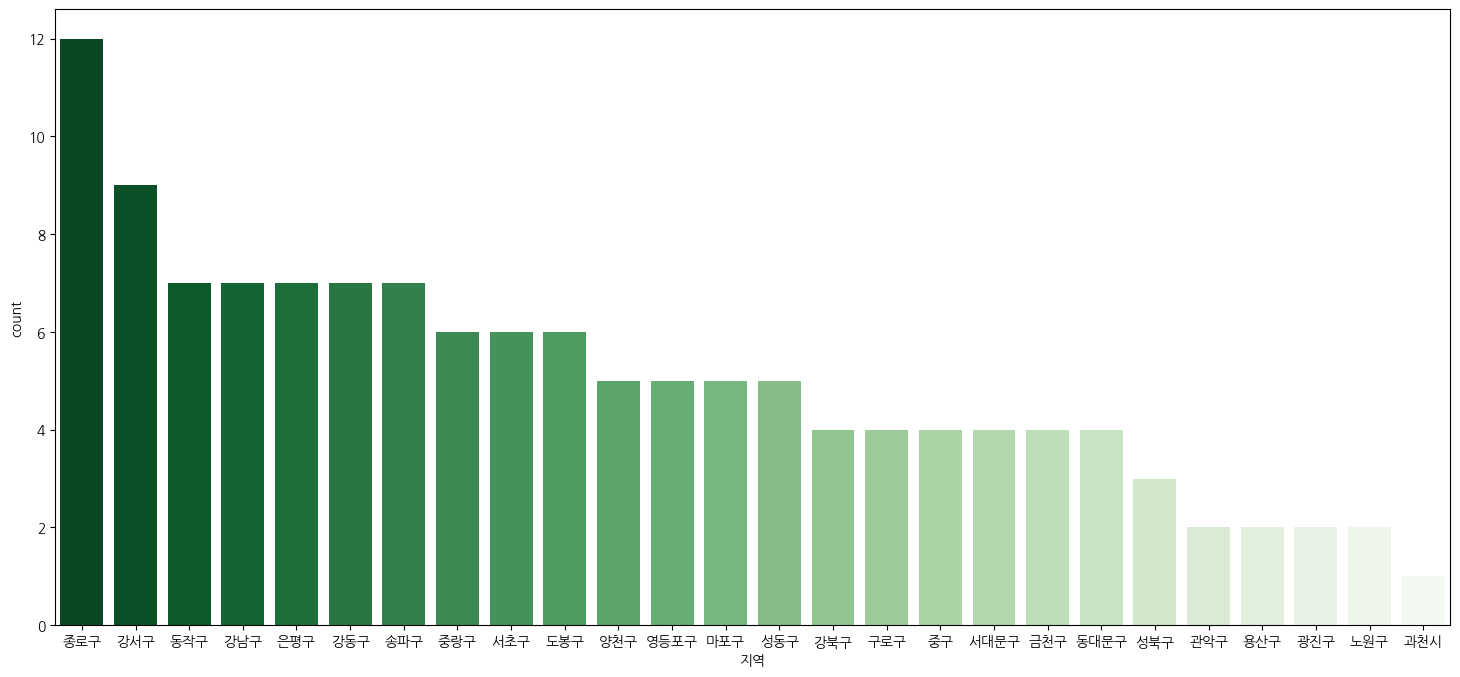

In [25]:
plt.figure(figsize = (18, 8))
sns.countplot(data = final_data[final_data['종류'] == '공원'], x = '지역', order = final_data[final_data['종류'] == '공원']['지역'].value_counts().index, palette="Greens_r")
plt.show()

### 지도 시각화

In [26]:
import folium

# 위도와 경도 데이터
latitude = final_data["위도"]
longitude = final_data["경도"]

# 지도 중심 설정
l = latitude.mean()
m = longitude.mean()
CA_map = folium.Map(location=[l, m], zoom_start=12)

# 조건에 따라 다른 마커 아이콘 및 가로로 팝업 설정
for n in final_data.index:
    location = [final_data.loc[n, "위도"], final_data.loc[n, "경도"]]
    name = final_data.loc[n, "이름"]
    # address = final_data.loc[n, "주소"]
    popup_text = f"{name}"
    mark_type = final_data.loc[n, "종류"]

    # 가로로 나타내는 HTML을 생성하여 팝업에 추가
    popup_html = f'<div style="display: flex; flex-direction: column; width: 200px;">{popup_text}</div>'

    if mark_type == "동물병원":
        folium.Marker(
            location=location,
            popup=folium.Popup(popup_html, max_width=300),  # max_width로 팝업 가로 크기 조절
            icon=folium.Icon(icon='star', color='red')
        ).add_to(CA_map)
    elif mark_type == "공원":
        folium.Marker(
            location=location,
            popup=folium.Popup(popup_html, max_width=300),  # max_width로 팝업 가로 크기 조절
            icon=folium.Icon(icon='leaf', color='green')
        ).add_to(CA_map)

# 지도를 HTML 파일로 저장
CA_map.save('/content/drive/MyDrive/데이터 분석/꼬순내/map.html')


In [27]:
CA_map